In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
np.random.seed(0)

## dataset

In [3]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
N_PIXELS = 28*28
N_CLASSES = 10

In [6]:
x_train = x_train.reshape(-1, N_PIXELS) / 255
x_test  = x_test .reshape(-1, N_PIXELS) / 255

In [7]:
y_train = to_categorical(y_train, N_CLASSES)
y_test  = to_categorical(y_test,  N_CLASSES)

## model

In [8]:
from experiment_models import keras_example, no_dropout, classic_dropout, static_dropout, our_dropout

In [9]:
models = {
    'baseline': keras_example(),
    'no d/o': no_dropout(),
    'classic d/o': classic_dropout(),
    'static d/o': static_dropout(),
    'our d/o': our_dropout()
}

## train

In [10]:
from bio_do import MaskAdvancer

In [11]:
from time import time

In [12]:
histories = {}
times = {}

for name, model in models.items():
    print(name)
    t0 = time()
    h = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                  batch_size=128, epochs=20, 
                  verbose=1,
                  callbacks=[MaskAdvancer(every=3)])

    times[name] = time() - t0
    histories[name] = h.history

baseline
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.5147 - acc: 0.8159 - val_loss: 0.4008 - val_acc: 0.8512
Epoch 2/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3814 - acc: 0.8616 - val_loss: 0.3768 - val_acc: 0.8639
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3460 - acc: 0.8730 - val_loss: 0.3568 - val_acc: 0.8703
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3258 - acc: 0.8786 - val_loss: 0.3477 - val_acc: 0.8755
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.3116 - acc: 0.8850 - val_loss: 0.3447 - val_acc: 0.8759
Epoch 6/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2997 - acc: 0.8882 - val_loss: 0.3306 - val_acc: 0.8812
Epoch 7/20
60000/60000 [==============================] - 4s 64us/step - loss: 0.2856 - acc: 0.8931 - val_loss: 0.3292 

In [25]:
baseline = histories['baseline']['val_acc'][-1]

In [24]:
ours = histories['our d/o']['val_acc'][-1]

In [29]:
f'{(1 - ours/baseline):.2%} performance drop'

'3.79% performance drop'

In [35]:
from bio_do import CustomConnections

In [41]:
our_conns = sum(layer.masks[-1].sum() 
                for layer in models['our d/o'].layers 
                if isinstance(layer, CustomConnections))

In [49]:
traditional_conns = 784*512 + 512*512 + 512*10

In [50]:
f'{our_conns:,} vs {traditional_conns:,} conns'

'11,490 vs 668,672 conns'

In [51]:
f'{our_conns/traditional_conns:.2%} conns'

'1.72% conns'

## viz

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

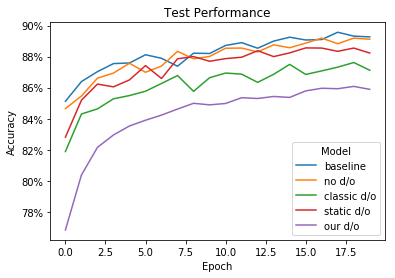

In [17]:
for name, history in histories.items():
    plt.plot(history['val_acc'], label=name)

plt.title('Test Performance')
plt.legend(loc=4, title='Model')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in plt.gca().get_yticks()])
# plt.ylim(.8, 1)

plt.show()

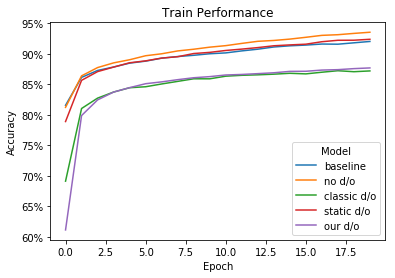

In [18]:
for name, history in histories.items():
    plt.plot(history['acc'], label=name)

plt.title('Train Performance')
plt.legend(loc=4, title='Model')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.gca().set_yticklabels(['{:.0%}'.format(y) for y in plt.gca().get_yticks()])
# plt.ylim(.8, 1)

plt.show()